# Operation of the Temperature Control Laboratory

The primary purpose of this notebook is to test and verify correct operation of the Temperature Control Laboratory. Before starting, be sure the latest version of TCLab firmware has been installed on the Arduino, and the lastest version of the `tclab` has been installed on your laptop. The library can be installed by copying and runing the following command into a new code cell:

    !pip install tclab
    
And prerequisite libraries, such as `pyserial` will be installed at the same time. To upgrade a previous installation, use

    !pip install tclab --upgrade

In [33]:
!pip install tclab --upgrade

Requirement already up-to-date: tclab in /Users/jeff/opt/anaconda3/lib/python3.7/site-packages (0.4.9)


## Establishing connection with `tclab.TCLab`

The interface to the Temperature Control Laboratory is established by creating an instance of a `TCLab` object from the `tclab` library. When all operations are complete, the instance should be closed. The following cell opens a serial connection to the TCLab hardware over USB, turns on the LED at 100% power, and then closes the connection. The output of this cell will report:

* version number of the tclab Python library
* device port and speed of the serial connection
* version number of the TCLab firmware

The LED will return to normal operation after 10 seconds.

In [1]:
from tclab import TCLab

lab = TCLab()
lab.LED(100)
lab.close()

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


The Python `with` statement provides a more convenient syntax for coding with the Temperature Control Laboratory.  The `with` statement creates an instance of `TCLab` and assigns the name given after `as`.  Once the code block is complete, the `TCLab.close()` command is executed automatically.  Generally speaking, this is the preferred syntax for coding with TCLab.

In [37]:
from tclab import TCLab

with TCLab() as lab:
    lab.LED(100)

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


The following code uses the `TCLab.LED()` command to cause the LED to blink on and off at 100% brightness once a second for five seconds. The standard Python library function `time.sleep()` is used to pause execution.

In [38]:
from tclab import TCLab
import time

with TCLab() as lab:
    for k in range(0, 5):        # repeat 5 times
        lab.LED(100)             # LED set to 100%
        time.sleep(0.5)          # sleep for 0.5 seconds
        lab.LED(0)               # LED set to 0%
        time.sleep(0.5)          # sleep for 0.5 seconds

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Reading the temperature sensors

The temperatures measured by the thermisters located on the TCLab are accessed as if they were Python variables `TCLab.T1` and `TCLab.T2`. The following cell accesses and prints the current temperatures of the two thermisters.

In [39]:
from tclab import TCLab

with TCLab() as lab:
    print("Temperature 1: {0:0.2f} C".format(lab.T1))
    print("Temperature 2: {0:0.2f} C".format(lab.T2))

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
Temperature 1: 24.77 C
Temperature 2: 24.77 C
TCLab disconnected successfully.


## Setting Heater Power

Power for the heaters on the Temperature Control Lab is provided through a USB power cord and a USB power supply. Too achieve the maximum operating envelope the power supply should be capable of 2 amps or 10 watts.

The power to each heater is the specified as the product of a specified maximum power multiplied by the percentaage of that power to use.  For heater 1, the maximum power is specified by the variable `TCLab.P1` and the percentage of power to use by `TCLab.U1`. A similar rule holds for heater 2.

The applied power, in watts, for heaters 1 and 2 are given by

    lab = TCLab()
    power_in_watts_heater_1 = 0.013 * lab.P1 * lab.U1 / 100
    power_in_watts_heater_2 = 0.013 * lab.P2 * lab.U2 / 100
    
where the value 0.013 is a conversion from values used in the coding to actual power in measured in watts. 

### Setting maximum power levels `tclab.TCLab.P1` and `tclab.TCLab.P2`

The maximum power available from each heater is adjusted assigning values in the range from 0 to 255 to variables `TCLab.P1` and `TCLab.P2`. Default values of 200 and 100, respectively, are assigned upon the start of a new connection.

To convert `TCLab.P1` and `TCLab.P2` values to watts, multiply by a conversion factor of 0.013 watts/unit.

In [58]:
from tclab import TCLab

with TCLab() as lab:
    print("Startup conditions")
    print("Maximum power of heater 1:", lab.P1, "=", lab.P1*0.013, "watts")
    print("Maximum power of heater 1:", lab.P2, "=", lab.P2*0.013, "watts")
    print()
    print("Set maximum power to 255")
    lab.P1 = 255
    lab.P2 = 255
    print("Maximum power of heater 1:", lab.P1, "=", lab.P1*0.013, "watts")
    print("Maximum power of heater 1:", lab.P2, "=", lab.P2*0.013, "watts")    

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
Startup conditions
Maximum power of heater 1: 200.0 = 2.6 watts
Maximum power of heater 1: 100.0 = 1.3 watts

Set maximum power to 255
Maximum power of heater 1: 255.0 = 3.315 watts
Maximum power of heater 1: 255.0 = 3.315 watts
TCLab disconnected successfully.


### Setting heater power levels `tclab.TCLab.U1` and `tclab.TCLab.U2`

The power to each heater can be accessed or set with variables `TCLab.U1` and `TCLab.U2` with values ranging from 0 to 100.

In [70]:
from tclab import TCLab
import time

with TCLab() as lab:
    print()
    print("Starting Temperature 1: {0:0.2f} C".format(lab.T1), flush=True)
    print("Starting Temperature 2: {0:0.2f} C".format(lab.T2), flush=True)
    
    print()
    print("Maximum power of heater 1:", lab.P1, "=", 0.013*lab.P1, "watts")
    print("Maximum power of heater 2:", lab.P2, "=", 0.013*lab.P2, "watts")
    
    print()
    print("Set Heater 1:", lab.Q1(100), "%", flush=True)
    print("Set Heater 2:", lab.Q2(100), "%", flush=True)
    
    t_heat = 60
    print()
    print("Heat for", t_heat, "seconds")
    time.sleep(t_heat)

    print()
    print("Set Heater 1:", lab.Q1(0), "%",flush=True)
    print("Set Heater 2:", lab.Q2(0), "%",flush=True)
    
    print()
    print("Final Temperature 1: {0:0.2f} C".format(lab.T1))
    print("Final Temperature 2: {0:0.2f} C".format(lab.T2))
    print()

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.

Starting Temperature 1: 49.59 C
Starting Temperature 2: 39.60 C

Maximum power of heater 1: 200.0 = 2.6 watts
Maximum power of heater 2: 100.0 = 1.3 watts

Set Heater 1: 100.0 %
Set Heater 2: 100.0 %

Heat for 60 seconds

Set Heater 1: 0.0 %
Set Heater 2: 0.0 %

Final Temperature 1: 54.75 C
Final Temperature 2: 43.47 C

TCLab disconnected successfully.


### Setting heater power levels TCLab.Q1() and TCLab.Q2()

Earlier versions of the Temperature Control Lab used functions `TCLab.Q1()` and `TCLab.Q2()` to set the percentage of maximum power applied to heaters 1 and 2, respectively.  These are functionally equivalent to assigning values to `TCLab.P1` and `TCLab.P2`.  

## Synchronizing with real time using `tclab.clock(tperiod, tsample)`

Coding for the Temperature Control Laboratory will typically include a code block that must be executed at regular intervals for a period of time.  `tclab.clock(tperiod, tsample)` is a Python iterator designed to simplify coding for those applications, where `tperiod` is the period of operation and `tsample` is the time between executions of the code block. 

The following code will print "Hello, World" every two seconds for sixty seconds.

    from tclab import TCLab, clock
    
    with TCLab() as lab:
        for t in clock(60, 2):
            pass

The following code cell demonstrates use of `tclab.clock()` to read a series of temperature measurements.

In [3]:
from tclab import TCLab, clock

tperiod = 60
tsample = 2

# connect to the temperature control lab

with TCLab() as lab:
    # turn heaters on
    print()
    lab.P1 = 200
    lab.P2 = 100
    
    lab.U1 = 100
    lab.U2 = 100
    print("Set Heater 1 to {0:0.1f}% of max power of {1:0.1f} units".format(lab.U1, lab.P1))
    print("Set Heater 2 to {0:0.1f}% of max power of {1:0.1f} units".format(lab.U2, lab.P2))

    # report temperatures for the next tperiod seconds
    print()
    for t in clock(tperiod, tsample):
        print("   {0:5.1f} sec:   T1 = {1:0.1f} C    T2 = {2:0.1f} C".format(t, lab.T1, lab.T2), flush=True)
        
    lab.U1 = 0
    lab.U2 = 0

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.

Set Heater 1 to 100.0% of max power of 200.0 units
Set Heater 2 to 100.0% of max power of 100.0 units

     0.0 sec:   T1 = 29.0 C    T2 = 28.6 C
     2.0 sec:   T1 = 29.0 C    T2 = 28.6 C
     4.0 sec:   T1 = 29.0 C    T2 = 28.6 C
     6.0 sec:   T1 = 29.0 C    T2 = 28.6 C
     8.0 sec:   T1 = 28.6 C    T2 = 28.6 C
    10.0 sec:   T1 = 28.6 C    T2 = 28.6 C
    12.0 sec:   T1 = 28.6 C    T2 = 28.6 C
    14.0 sec:   T1 = 28.6 C    T2 = 28.6 C
    16.0 sec:   T1 = 28.6 C    T2 = 28.6 C
    18.0 sec:   T1 = 28.6 C    T2 = 28.3 C
    20.0 sec:   T1 = 28.6 C    T2 = 29.3 C
    22.0 sec:   T1 = 28.6 C    T2 = 28.3 C
    24.0 sec:   T1 = 28.6 C    T2 = 29.3 C
    26.0 sec:   T1 = 29.0 C    T2 = 29.3 C
    28.0 sec:   T1 = 29.0 C    T2 = 28.6 C
    30.0 sec:   T1 = 29.3 C    T2 = 28.6 C
    32.0 sec:   T1 = 29.6 C    T2 = 29.9 C
    34.0 sec:   T1 = 29.9 

## Data logging with `tclab.Historian`

A common requirement in commercial process control systems is to maintain a log of all important process data. `tclab.Historian` is a simple implementation of data historian for the Temperature Control Laboratory.

An instance of the `tclab.Historian` from a list of data sources after a connection has been created with `tclab.TCLab`. The data sources are name/function pairs where the function creates the value to be logged. 

In [52]:
from tclab import TCLab, clock, Historian
    
with TCLab() as lab:
    sources = [
        ('T1', lambda: lab.T1),
        ('T2', lambda: lab.T2),
        ('P1', lambda: lab.P1),
        ('U1', lambda: lab.U1),
        ('P2', lambda: lab.P2),
        ('U2', lambda: lab.U2),
    ]
    h = Historian(sources)
    lab.U1 = 100
    for t in clock(30, 2):
        h.update(t)

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


        Time     T1     T2     P1     U1     P2   U2
Time                                                
0.00    0.00  26.06  24.77  200.0  100.0  100.0  0.0
2.00    2.00  26.06  24.77  200.0  100.0  100.0  0.0
4.00    4.00  26.06  24.45  200.0  100.0  100.0  0.0
6.00    6.00  26.06  24.45  200.0  100.0  100.0  0.0
8.00    8.00  26.06  24.45  200.0  100.0  100.0  0.0
10.00  10.00  26.06  24.77  200.0  100.0  100.0  0.0
12.00  12.00  25.74  24.45  200.0  100.0  100.0  0.0
14.01  14.01  25.74  24.45  200.0  100.0  100.0  0.0
16.01  16.01  25.74  24.45  200.0  100.0  100.0  0.0
18.01  18.01  25.74  24.45  200.0  100.0  100.0  0.0
20.00  20.00  25.74  24.45  200.0  100.0  100.0  0.0
22.00  22.00  25.74  24.45  200.0  100.0  100.0  0.0
24.00  24.00  25.74  24.45  200.0  100.0  100.0  0.0
26.00  26.00  25.74  24.45  200.0  100.0  100.0  0.0
28.00  28.00  25.74  24.45  200.0  100.0  100.0  0.0
30.00  30.00  25.74  24.45  200.0  100.0  100.0  0.0


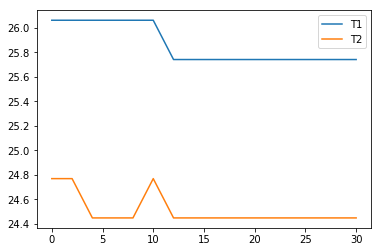

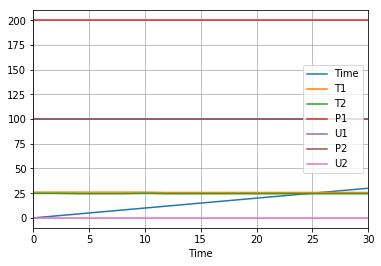

In [54]:
# plotting
import matplotlib.pyplot as plt
t, T1, T2, P1, U1, P2, U2 = h.fields
plt.plot(t, T1, t, T2)
plt.legend(['T1', 'T2'])

# saving to a file
h.to_csv('data.csv')

# reading from file and plotting with pandas
import pandas as pd
data = pd.read_csv('data.csv')
data.index = data['Time']
print(data)
data.plot(grid=True)

## Real time plotting with `tclab.Plotter`

The `tclab.Plotter` class adds to the functionality of `tclab.Historian` by providing real-time plotting of experimental data. An instance of a plotter is created after an historian has been created.

    h = Historian(sources)
    p = Plotter(h, tperiod)
    
The plotter is updated by

    p.update(t)
    
which also updates the associated historian. 

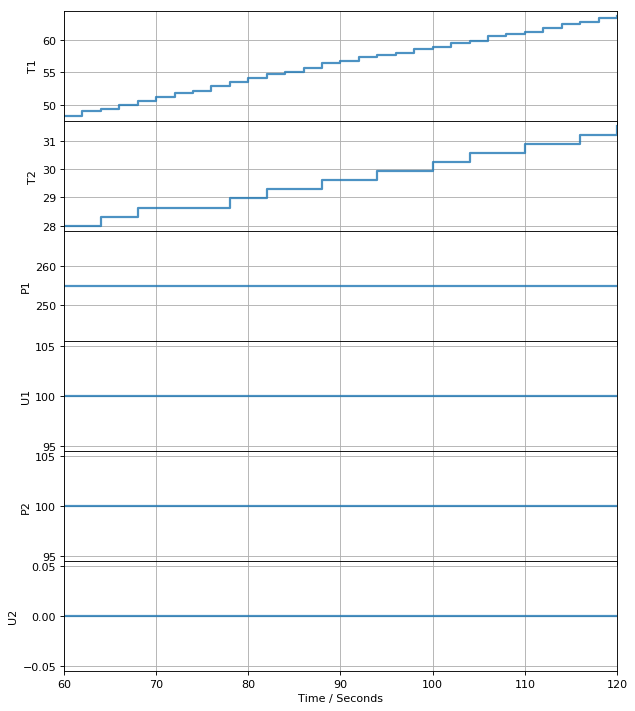

TCLab disconnected successfully.


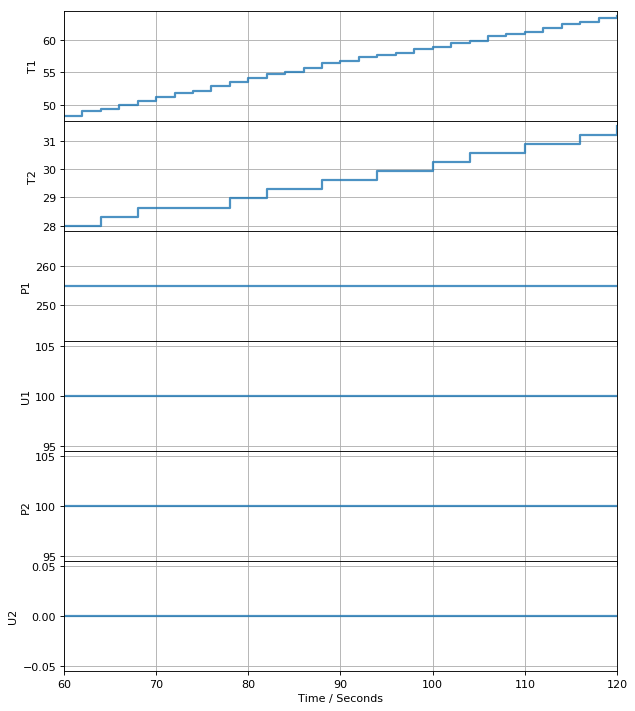

In [58]:
from tclab import TCLab, clock, Historian, Plotter

tperiod = 120
tsample = 2
    
with TCLab() as lab:
    sources = [
        ('T1', lambda: lab.T1),
        ('T2', lambda: lab.T2),
        ('P1', lambda: lab.P1),
        ('U1', lambda: lab.U1),
        ('P2', lambda: lab.P2),
        ('U2', lambda: lab.U2),
    ]
    h = Historian(sources)
    p = Plotter(h, 60)
    lab.P1 = 255
    lab.U1 = 100
    for t in clock(tperiod, tsample):
        p.update(t)

## Example Application: Relay Control

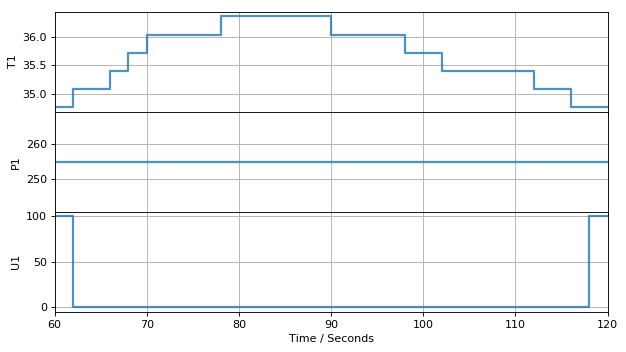

TCLab disconnected successfully.


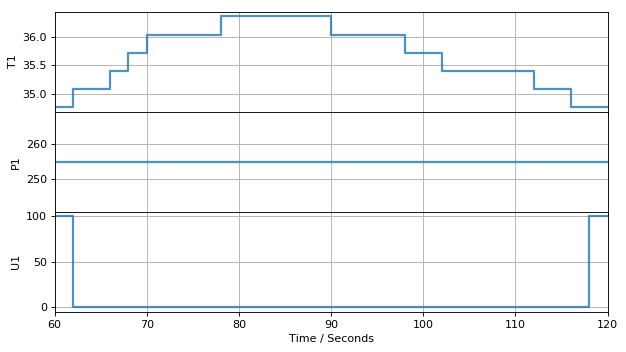

In [60]:
from tclab import TCLab, clock, Historian, Plotter

tperiod = 120
tsample = 2
Tsetpoint = 35
    
with TCLab() as lab:
    sources = [
        ('T1', lambda: lab.T1),
        ('P1', lambda: lab.P1),
        ('U1', lambda: lab.U1),
    ]
    h = Historian(sources)
    p = Plotter(h, 60)
    lab.P1 = 255
    for t in clock(tperiod, tsample):
        lab.U1 = 100 if lab.T1 < Tsetpoint else 0
        p.update(t)